In [1]:
from __future__ import print_function
import math
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics

import tensorflow as tf
from tensorflow.python.data import Dataset

pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format
california_housing_dataframe = pd.read_csv("https://raw.githubusercontent.com/timothypesi/Data-Sets-For-Machine-Learning-/main/california_housing_train.csv", sep=",")
california_housing_dataframe = california_housing_dataframe.reindex(np.random.permutation(california_housing_dataframe.index))
california_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1754,-117.2,32.8,39.0,1846.0,350.0,765.0,329.0,3.9,311900.0
9088,-119.0,34.2,9.0,10618.0,1617.0,4830.0,1606.0,6.6,284200.0
8534,-118.5,34.2,36.0,1656.0,310.0,817.0,308.0,5.6,215900.0
5954,-118.2,34.0,44.0,1550.0,407.0,1718.0,403.0,2.5,141100.0
16028,-122.4,37.7,46.0,3581.0,758.0,1670.0,703.0,4.2,269200.0
...,...,...,...,...,...,...,...,...,...
3847,-118.0,34.0,33.0,1453.0,326.0,1609.0,319.0,3.8,155800.0
14303,-122.1,37.4,30.0,1502.0,186.0,501.0,180.0,10.0,500001.0
13257,-121.9,37.3,28.0,3104.0,811.0,1488.0,754.0,3.6,332600.0
2386,-117.5,34.1,4.0,17577.0,2819.0,7766.0,2473.0,5.1,181800.0


In [2]:
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207300.9
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,115983.8
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,14999.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119400.0
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180400.0
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265000.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500001.0


In [3]:
california_housing_dataframe[['latitude', 'total_bedrooms']]

,latitude,total_bedrooms
7026,33.8,572.0
16234,37.7,828.0
16897,40.7,634.0
14461,37.5,332.0
6364,34.1,263.0
...,...,...
1912,34.1,528.0
5205,33.8,322.0
10242,37.5,315.0
12176,38.5,340.0


In [4]:
california_housing_dataframe['COPYstolbec']=california_housing_dataframe['median_income'].copy()
california_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,COPYstolbec
7026,-118.3,33.8,29.0,2795.0,572.0,1469.0,557.0,3.7,308900.0,3.7
16234,-122.5,37.7,38.0,3195.0,828.0,2410.0,778.0,3.1,350000.0,3.1
16897,-124.0,40.7,28.0,3513.0,634.0,1658.0,598.0,3.8,119900.0,3.8
14461,-122.1,37.5,37.0,2295.0,332.0,933.0,332.0,6.7,500001.0,6.7
6364,-118.3,34.1,52.0,1310.0,263.0,689.0,208.0,4.1,350000.0,4.1
...,...,...,...,...,...,...,...,...,...,...
1912,-117.3,34.1,52.0,2424.0,528.0,1171.0,455.0,1.5,77900.0,1.5
5205,-118.1,33.8,36.0,1749.0,322.0,855.0,319.0,4.6,227100.0,4.6
10242,-120.0,37.5,32.0,1312.0,315.0,600.0,265.0,1.5,91500.0,1.5
12176,-121.5,38.5,24.0,1766.0,340.0,1028.0,372.0,3.5,98700.0,3.5


In [5]:
califDataCopy=california_housing_dataframe.copy()
califDataCopy.head(10).describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,COPYstolbec
count,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
mean,-119.9,35.7,32.5,1823.9,368.3,943.4,346.1,4.9,331880.3,4.9
std,2.3,2.5,9.8,1108.3,248.8,708.5,237.6,2.7,142989.2,2.7
min,-124.0,33.8,16.0,50.0,10.0,20.0,6.0,2.6,119900.0,2.6
25%,-121.9,33.9,28.2,1071.0,208.2,537.0,182.5,3.3,233750.0,3.3
50%,-118.4,34.1,32.5,1602.0,317.5,729.0,303.0,3.9,346900.0,3.9
75%,-118.3,37.7,37.0,2670.0,533.0,1335.0,515.8,5.5,462500.8,5.5
max,-118.0,40.7,52.0,3513.0,828.0,2410.0,778.0,11.7,500001.0,11.7


In [6]:
california_housing_dataframe.head(15)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,COPYstolbec
7026,-118.3,33.8,29.0,2795.0,572.0,1469.0,557.0,3.7,308900.0,3.7
16234,-122.5,37.7,38.0,3195.0,828.0,2410.0,778.0,3.1,350000.0,3.1
16897,-124.0,40.7,28.0,3513.0,634.0,1658.0,598.0,3.8,119900.0,3.8
14461,-122.1,37.5,37.0,2295.0,332.0,933.0,332.0,6.7,500001.0,6.7
6364,-118.3,34.1,52.0,1310.0,263.0,689.0,208.0,4.1,350000.0,4.1
...,...,...,...,...,...,...,...,...,...,...
1222,-117.1,32.7,38.0,1445.0,392.0,1286.0,357.0,1.5,80200.0,1.5
2382,-117.5,33.8,7.0,2191.0,324.0,1156.0,310.0,5.5,195600.0,5.5
8044,-118.4,34.2,17.0,277.0,70.0,119.0,59.0,4.0,341700.0,4.0
12489,-121.6,39.1,26.0,1405.0,204.0,627.0,215.0,4.2,94200.0,4.2


In [7]:
california_housing_dataframe.head(10).sort_values(by='population')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,COPYstolbec
11458,-121.2,37.9,16.0,50.0,10.0,20.0,6.0,2.6,137500.0,2.6
7157,-118.3,33.8,37.0,1080.0,135.0,366.0,142.0,11.7,500001.0,11.7
3878,-118.0,33.8,35.0,1068.0,190.0,514.0,174.0,4.1,208700.0,4.1
8236,-118.4,34.0,30.0,1039.0,303.0,606.0,274.0,3.1,343800.0,3.1
6364,-118.3,34.1,52.0,1310.0,263.0,689.0,208.0,4.1,350000.0,4.1
7183,-118.3,34.1,23.0,1894.0,416.0,769.0,392.0,6.0,500001.0,6.0
14461,-122.1,37.5,37.0,2295.0,332.0,933.0,332.0,6.7,500001.0,6.7
7026,-118.3,33.8,29.0,2795.0,572.0,1469.0,557.0,3.7,308900.0,3.7
16897,-124.0,40.7,28.0,3513.0,634.0,1658.0,598.0,3.8,119900.0,3.8
16234,-122.5,37.7,38.0,3195.0,828.0,2410.0,778.0,3.1,350000.0,3.1


<Axes: xlabel='total_rooms'>

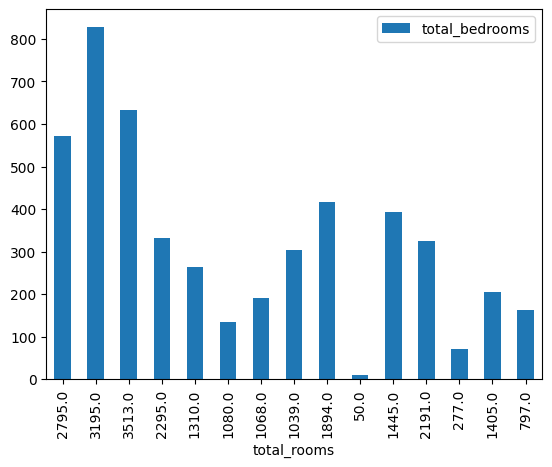

In [8]:
california_housing_dataframe.head(15).plot.bar(x='total_rooms', y='total_bedrooms')

In [9]:
california_housing_dataframe.iloc[:2]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,COPYstolbec
7026,-118.3,33.8,29.0,2795.0,572.0,1469.0,557.0,3.7,308900.0,3.7
16234,-122.5,37.7,38.0,3195.0,828.0,2410.0,778.0,3.1,350000.0,3.1


In [10]:
california_housing_dataframe.iloc[-2:]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,COPYstolbec
12176,-121.5,38.5,24.0,1766.0,340.0,1028.0,372.0,3.5,98700.0,3.5
6950,-118.3,34.0,26.0,1809.0,640.0,2543.0,640.0,2.4,500000.0,2.4


In [11]:
california_housing_dataframe[california_housing_dataframe["population"] > 8000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,COPYstolbec
1838,-117.3,33.2,5.0,20908.0,3933.0,9690.0,3510.0,4.1,198500.0,4.1
3238,-117.9,34.0,10.0,17820.0,2812.0,8686.0,2666.0,6.4,310700.0,6.4
2274,-117.4,33.4,14.0,25135.0,4819.0,35682.0,4769.0,2.6,134400.0,2.6
4771,-118.1,34.7,4.0,23386.0,4171.0,10493.0,3671.0,4.0,144000.0,4.0
12586,-121.7,36.7,12.0,19234.0,4492.0,12153.0,4372.0,3.3,152800.0,3.3
...,...,...,...,...,...,...,...,...,...,...
8734,-118.6,34.5,5.0,538.0,98.0,8733.0,105.0,4.2,154600.0,4.2
2001,-117.3,33.2,11.0,20944.0,3753.0,8738.0,3441.0,4.4,215500.0,4.4
11803,-121.3,38.8,3.0,20214.0,3559.0,8361.0,3112.0,4.2,169300.0,4.2
5646,-118.2,34.0,26.0,6895.0,1877.0,8551.0,1808.0,2.3,154500.0,2.3


In [12]:
california_housing_dataframe[(california_housing_dataframe["population"] > 1300) & (california_housing_dataframe["households"] > 5051) ]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,COPYstolbec
12772,-121.8,36.6,11.0,32627.0,6445.0,28566.0,6082.0,2.3,118800.0,2.3
2871,-117.7,33.9,4.0,37937.0,5471.0,16122.0,5189.0,7.5,366300.0,7.5


In [13]:
california_housing_dataframe[(california_housing_dataframe["population"] > 1300) ^ (california_housing_dataframe["households"] > 5051) ]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,COPYstolbec
7026,-118.3,33.8,29.0,2795.0,572.0,1469.0,557.0,3.7,308900.0,3.7
16234,-122.5,37.7,38.0,3195.0,828.0,2410.0,778.0,3.1,350000.0,3.1
16897,-124.0,40.7,28.0,3513.0,634.0,1658.0,598.0,3.8,119900.0,3.8
6869,-118.3,33.9,37.0,2132.0,565.0,1369.0,565.0,3.3,218100.0,3.3
8862,-118.8,34.3,25.0,3371.0,502.0,1717.0,506.0,6.1,225000.0,6.1
...,...,...,...,...,...,...,...,...,...,...
13715,-122.0,38.0,32.0,3364.0,666.0,1980.0,678.0,3.7,179000.0,3.7
8988,-118.9,34.2,17.0,2619.0,606.0,1655.0,557.0,3.9,281300.0,3.9
630,-117.0,32.7,5.0,3201.0,532.0,2061.0,536.0,5.1,179400.0,5.1
621,-117.0,32.7,38.0,3174.0,606.0,1557.0,619.0,3.6,123600.0,3.6


In [14]:
california_housing_dataframe[['COPYstolbec']].apply(lambda value: value*2)

,COPYstolbec
7026,7.4
16234,6.3
16897,7.6
14461,13.5
6364,8.1
...,...
1912,3.0
5205,9.3
10242,3.0
12176,7.1
